# Data Preprocessing with Pandas - basics 
<br>

Data preprocessing is a crucial step in any data science project. Raw data often contains noise, missing values, and inconsistencies that can affect model performance. This notebook will walk through the process of cleaning, transforming, and visualizing data using the Pandas library in Python. We will also explore visualizations to gain insights from the data and prepare it for analysis or machine learning models.

The following steps will guide you through common preprocessing tasks such as handling missing data, duplicates, outliers, encoding categorical variables, and visualizing data trends.



#### Agenda

##### 2. Loading the Data
##### 3. Handling Missing Data
##### 4. Handling Duplicates
##### 5. Renaming Columns
##### 6. Converting Data Types
##### 7. Handling Outliers
##### 8. Encoding Categorical Data
##### 9. Visualizations
##### 10. Saving Cleaned Data



In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
import matplotlib.pyplot as plt
from scipy import stats

warnings.filterwarnings("ignore")



<br>
<br>
<br>
<br>

## Loading the Data

In this section, we will load a dataset using Pandas. Pandas provides an easy-to-use interface for reading data from different file formats like CSV, Excel, or SQL databases.


In [2]:
# Load an example dataset
df = sns.load_dataset('iris')

# Display first few rows of the data
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Handling Missing Data

Missing data is a common issue when working with real-world datasets. Missing values can be caused by data entry errors, unrecorded events, or limitations in the data collection process. It is important to handle missing data carefully, as ignoring it can lead to biased results.

In this section, we will check for missing data, and demonstrate different ways to handle it:
- Removing rows or columns with missing values.
- Filling missing values using methods like the mean, median, or a custom value.


In [3]:
# Check for missing values
df.isnull().sum()


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [4]:
# If needed, drop rows/columns with missing data, or fill in missing data

# Drop rows with missing values
df = df.dropna()

# Drop columns with missing values
df = df.dropna(axis=1)

# Fill missing values with a specific value (e.g., 0 or mean)
#df['column_name'].fillna(df['column_name'].mean(), inplace=True)



## Handling Duplicates

Duplicates in the dataset can arise from data collection processes that may record the same event multiple times. Removing duplicates is essential to ensure that the dataset reflects unique records.

We will explore how to:
- Detect duplicates in the dataset.
- Remove duplicates to ensure data integrity.


In [5]:
# Check for duplicate rows
df.duplicated().sum()

np.int64(1)

In [6]:
# Drop duplicate rows
df = df.drop_duplicates()

## Renaming Columns

To make data more understandable or to conform to a specific format, it may be necessary to rename columns. This is especially helpful when working with datasets where column names are unclear or not intuitive.



In [7]:
# Rename column 
df_rename = df
df_rename.rename(columns={
    'sepal_length': 'Sepal_l'}, inplace=True)

# Check the updated dataframe
df_rename.head()


,Sepal_l,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Converting Data Types

Data often needs to be converted to the appropriate data types before analysis. For example, numerical data may sometimes be read in as strings (objects in Pandas), or dates might not be recognized in the correct format.

Here, we will explore:
- How to inspect the data types of columns.
- Convert columns to the appropriate data types (e.g., integers, floats, datetime).


In [8]:
# Convert a numerical column to string (just for demonstration)
# df['sepal_width'] = df['sepal_width'].astype('str')


## Handling Outliers

Outliers are data points that differ significantly from other observations. While outliers may represent genuine deviations, they can also distort analyses and model training. It is important to identify and decide whether to remove or handle them appropriately.

We will:
- Detect outliers using statistical methods like Z-scores.


In [9]:
# Calculate Z-scores for 'sepal_width'
z_scores = stats.zscore(df['sepal_width'])

# Remove outliers
df_no_outliers = df[(np.abs(z_scores) < 3)]

## Encoding Categorical Data

Many machine learning algorithms cannot work with categorical data directly. Therefore, it is necessary to encode categorical variables into numerical representations. Pandas provides several methods for this, including one-hot encoding.

In this section, we will:
- Convert categorical columns into numeric format using one-hot encoding.


In [10]:
# One-hot encoding of species column
df_encoded = pd.get_dummies(df, columns=['species'])
df_encoded.head()


,Sepal_l,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,True,False,False
1,4.9,3.0,1.4,0.2,True,False,False
2,4.7,3.2,1.3,0.2,True,False,False
3,4.6,3.1,1.5,0.2,True,False,False
4,5.0,3.6,1.4,0.2,True,False,False


## Visualizations

Visualizing data can help uncover patterns, trends, and potential issues in the dataset. It also helps in understanding the relationships between variables, and identifying outliers and distributions.

In this section, we will create various types of visualizations:
- **Correlation Heatmap**: Visualize relationships between numerical variables.
- **Histogram**: Visualize the distribution of values in a specific column.
- **Boxplot**: for Multiple Features
- **Swarm plot**: shows all the data points for each category, allowing you to see the spread and density of the points.
- **FacetGrid**: FacetGrid allows you to create multiple plots of a feature based on different subsets of data. This is useful when you want to explore the data distributions for multiple features across different species.
- **Count Plot**: A count plot shows the frequency of each category in a categorical column, such as species.

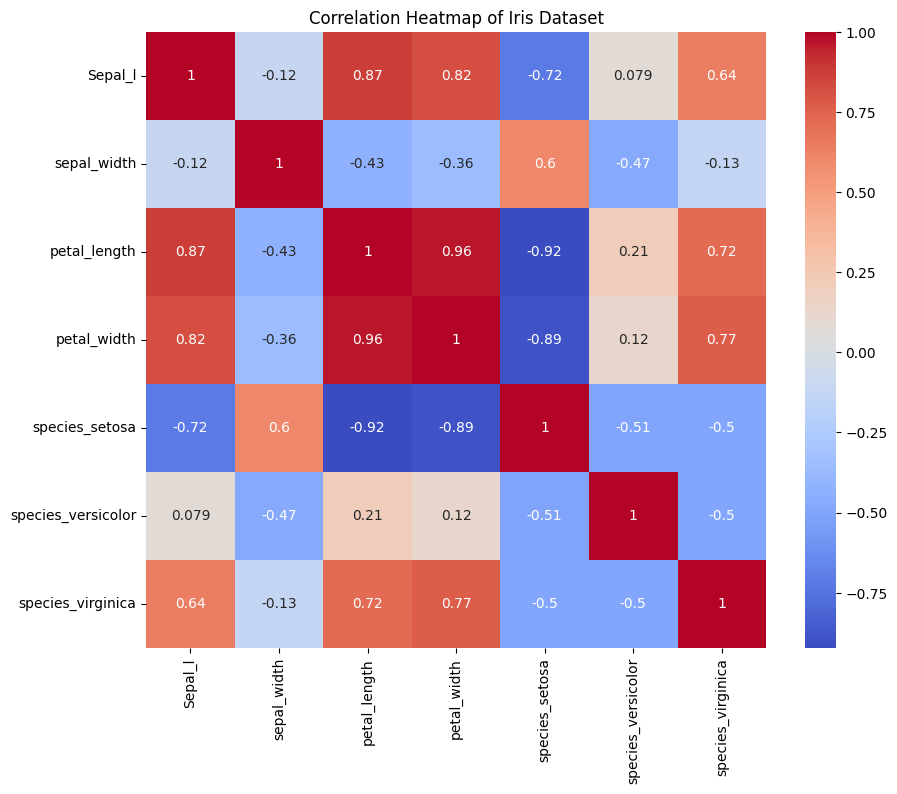

In [11]:
# Correlation matrix
correlation_matrix = df_encoded.corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Iris Dataset')
plt.show()

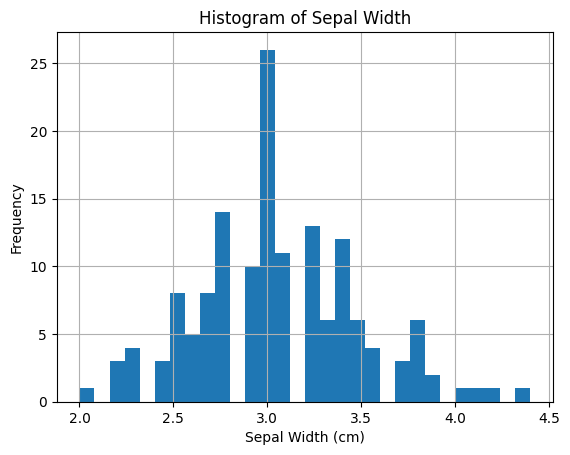

In [12]:
# Plot histogram for 'sepal_width'
df_encoded['sepal_width'].hist(bins=30)
plt.title('Histogram of Sepal Width')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Frequency')
plt.show()

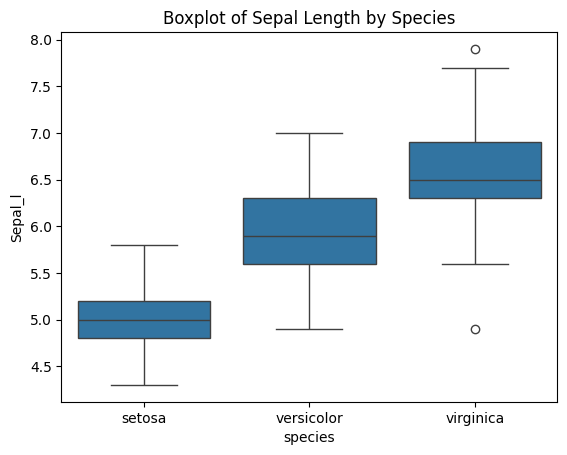

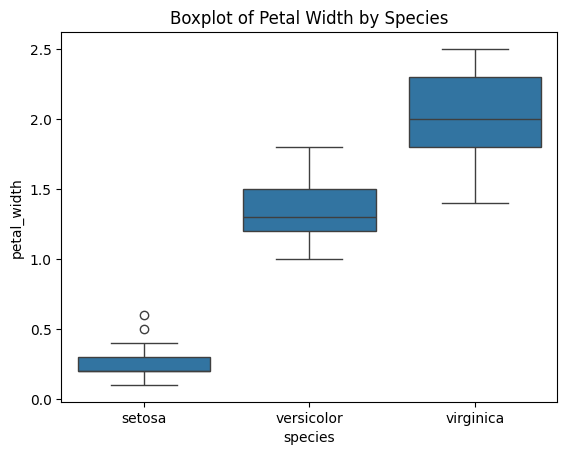

In [13]:
# Boxplot for Sepal Length grouped by species
sns.boxplot(x='species', y='Sepal_l', data=df)
plt.title('Boxplot of Sepal Length by Species')
plt.show()

# Boxplot for Petal Width grouped by species
sns.boxplot(x='species', y='petal_width', data=df)
plt.title('Boxplot of Petal Width by Species')
plt.show()


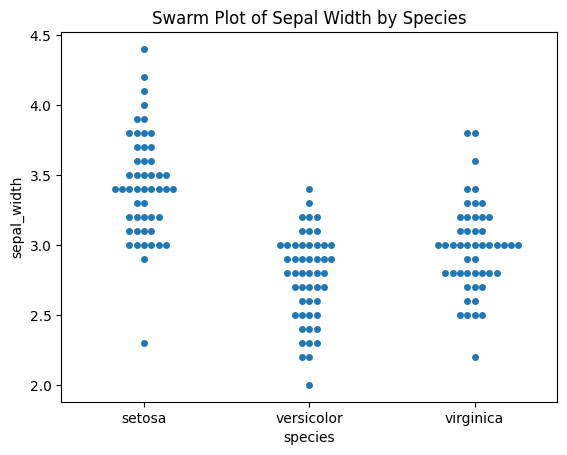

In [14]:
# Swarm plot for Sepal Width
sns.swarmplot(x='species', y='sepal_width', data=df)
plt.title('Swarm Plot of Sepal Width by Species')
plt.show()

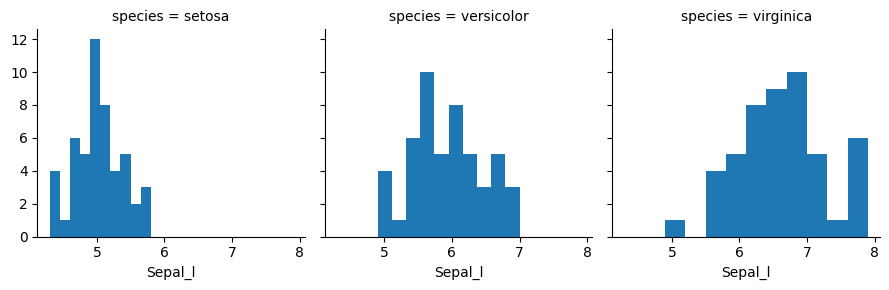

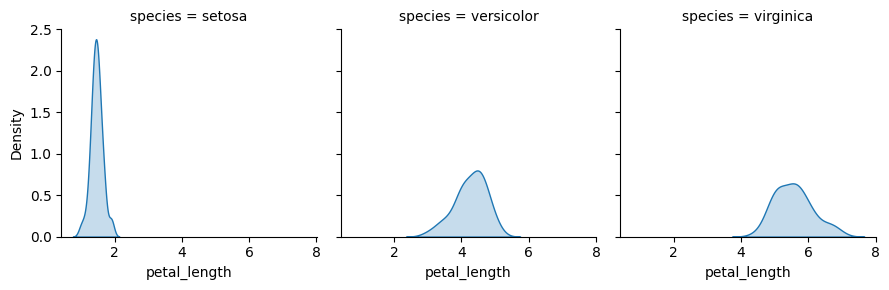

In [15]:
# FacetGrid with histograms of Sepal Length for each species
g = sns.FacetGrid(df, col='species')
g.map(plt.hist, 'Sepal_l', bins=10)
plt.show()

# FacetGrid with KDE plots of Petal Length for each species
g = sns.FacetGrid(df, col='species')
g.map(sns.kdeplot, 'petal_length', shade=True)
plt.show()


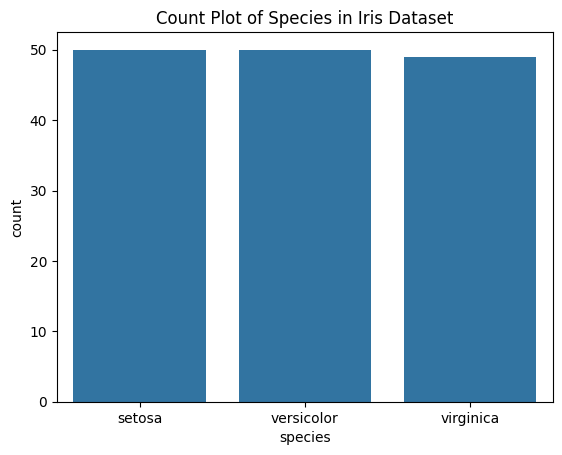

In [16]:
# Count plot for species
sns.countplot(x='species', data=df)
plt.title('Count Plot of Species in Iris Dataset')
plt.show()


In addition

## Saving the Cleaned Data

Once we have cleaned and preprocessed the data, we may want to save the transformed dataset for future use. Pandas provides methods to save the cleaned dataset into different formats, such as CSV, Excel, or even SQL databases.

Here, we will demonstrate how to save the cleaned dataset into a new CSV file.


In [17]:
# Save cleaned dataset to a new CSV file
df_encoded.to_csv('cleaned_iris_dataset.csv', index=False)
